# Chebyshev polynomials

In [27]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

## Part I: Plotting the Chebyshev polynomials

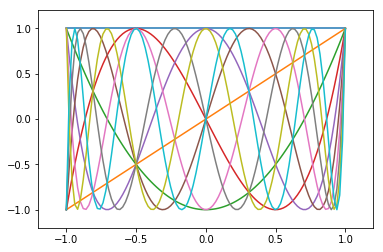

In [28]:
x = np.linspace(-1, 1, 100)

pt.xlim([-1.2, 1.2])
pt.ylim([-1.2, 1.2])

for k in range(10): # crank up
    pt.plot(x, np.cos(k*np.arccos(x)))

## Part II: Understanding the Nodes

What if we interpolate random data?

In [90]:
n = 50 # crank up

a = np.arange(n, dtype=np.float64)

# Chebyshev nodes:
nodes = np.cos((2*(a+1)-1)/(2*n)*np.pi)

# Equispace nodes:
#nodes = np.linspace(-1, 1, n)

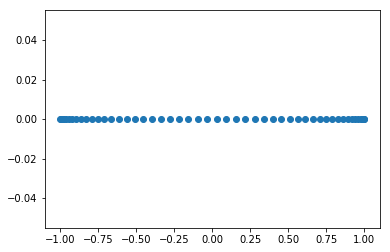

In [91]:
pt.plot(nodes, 0*nodes, "o")

## Part III: Chebyshev Interpolation
Compute Chebyshev Vandermonde matrix and store it in `V`. Solve for coefficients and store in `coeffs`.

In [92]:
if 1:
    V = np.zeros((n,n))
    V[:, 0] = 1
    V[:, 1] = nodes
    for i in range(2,n):
        V[:, i] = 2*nodes*V[:, i-1] - V[:, i-2]
else:
    V = np.cos(i*np.arccos(nodes.reshape(-1, 1)))
data = np.random.randn(n)
coeffs = la.solve(V, data)

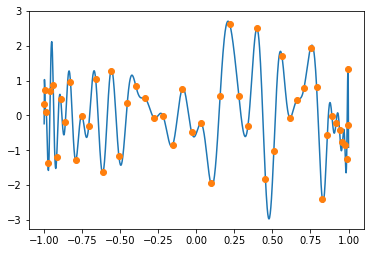

In [93]:
x = np.linspace(-1, 1, 1000)
Vfull = np.cos(a*np.arccos(x.reshape(-1, 1)))
pt.plot(x, Vfull @ coeffs)
pt.plot(nodes, data, "o")

## Part IV: Comparison with Monomial
Compute monomial Vandermonde matrix and store it in `Vm`. Solve for coefficients and store in `coeffsm`.

In [94]:
Vm = np.zeros(V.shape)
for i in range(n):
    Vm[:, i] = nodes**i
coeffsm = la.solve(Vm, data)

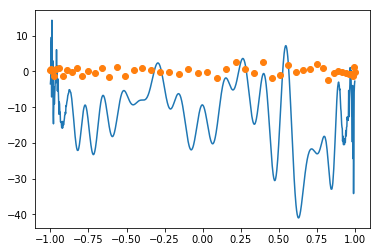

In [95]:
Vfullm = np.zeros(Vfull.shape)
for i in range(n):
    Vfullm[:, i] = x**i
pt.plot(x, Vfullm@coeffsm)
pt.plot(nodes, data, "o")

## Part IV: Conditioning

In [83]:
n = 10 # crank up

a = np.arange(n, dtype=np.float64)
nodes = np.cos((2*(a+1)-1)/(2*n)*np.pi)
V = np.cos(a*np.arccos(nodes.reshape(-1, 1)))

Vm = np.zeros(V.shape)
for i in range(n):
    Vm[:, i] = nodes**i

print(la.cond(Vm))
la.cond(V)

1472.0117005


1.4142135623730963